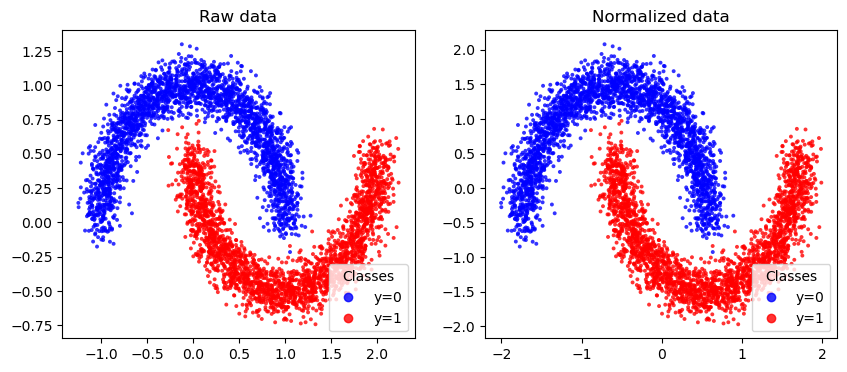

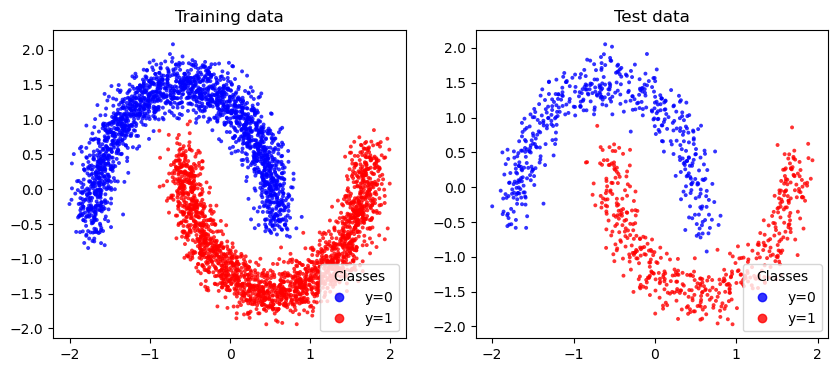

In [ ]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np
X,y = make_moons(noise=0.1, random_state=0,n_samples = 5000)
def scatter_2class(X, y, ylabels =['y=0','y=1'], alpha = 0.8, ax = None):
    if ax is None:
        fig, ax = plt.subplots()
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap ='bwr',s = 8, alpha = alpha, edgecolors = 'none')
    ax.legend(scatter.legend_elements()[0],ylabels , loc="lower right", title="Classes")



from sklearn.preprocessing import StandardScaler
X_norm = StandardScaler().fit_transform(X)

fig, axs = plt.subplots(1, 2, figsize = (10,4))
scatter_2class(X,y, ax = axs[0])
axs[0].set_title('Raw data')
scatter_2class(X_norm, y, ax = axs[1])
axs[1].set_title('Normalized data')
plt.show()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=0)

fig, axs = plt.subplots(1, 2, figsize = (10,4))
scatter_2class(X_train,y_train, ax = axs[0])
axs[0].set_title('Training data')
scatter_2class(X_test, y_test, ax = axs[1])
axs[1].set_title('Test data')
plt.show()


# Consider a neural network with 1 hidden layer 

![](https://miro.medium.com/v2/resize:fit:1400/format:webp/1*MaTvYkgr-be3UuY_Z_hxMQ.jpeg)
# Feedforward 
## Input layer --> hidden layer 
based on (5.2-5.3) 
$$ 
a_1 = \sum_{i = 1}^D w_{1i}x_i + b_1 \ \\
z_1 = h(a_1)$$
here we choose $h(\cdot)$ is a tanh function, with 
 $$
 \tanh(a) = \frac{e^a - e^{-a}}{e^a + e^{-a}} \ (5.59)\\
   \tanh'(a) = 1-\tanh(a)^2 \ (5.60)
   $$


## Hidden layer -->  output layer 
 (based on (5.4-6) )
$$ a_2 = \sum_{i = 1}^M w_{2i}z_1 + b_2$$
$$ y = \sigma(a_2)$$
where $\sigma(a) =\frac{1}{1+\exp(-a)}$ 
# Backpropagation 
## Cross-entropy error function of the sigmoid function 
$$ E(w) = -\sum_{n = 1}^N \{t_n \ln y_n +(1+t_n) \ln (1-y_n)\}  \ (5.21)$$

## Backpropagation: ouput layer --> hidden layer 
Size of $W_2$: (size_output, size_hidden_layer)

Gradient of $W_2$: 
$$
\frac{\partial E(w)}{\partial w_{ki}^{(2)}} = \sigma_{k} z_1 = (z_{k} -t_k) z_1
 \  \text{based on (5.53-5.54)}
$$


## Backpropagation: hidden layer --> input layer 
Size of $W_1$ : (size_hidden_layer, size_input)

Gradient of $W_1$: 
$$
\frac{\partial E(w)}{\partial w_{ji}^{(1)}} 
=\sigma_{j} x_i 
= x_ih'(a_i) \sum_k w_{ki}\sigma_{jk} 
 \ \   \text{based on (5.53-5.56)}
$$
where $h'(a) = 1-h(a)^2$ (5.60). 



## Gradient descent 

$$w_{ji} = w_{ji} - \eta * \frac{\partial E(w)}{\partial w_{ji}^{(1)}} \\
w_{ki} = w_{ki} -\eta * \frac{\partial E(w)}{\partial w_{ki}^{(2)}}$$
where $\eta$ is learning rate. 

In [ ]:
def sigmoid(a):
    return 1/(1+np.exp(-a))
class NeuralNetwork_simple():
    def __init__(self,size,learning_rate,n_epoch=1000 ):
        self.learning_rate =learning_rate
        self.size = size
        self.n_epoch=n_epoch
    def initial_params(self):
        size_input, size_hidden_layer, size_output = self.size
        Parameters = dict()
        Parameters['W1'] = np.random.randn(size_hidden_layer,size_input) * 0.01
        Parameters['b1']= np.zeros(shape=(size_hidden_layer, 1))
        Parameters['W2'] = np.random.randn(size_output,size_hidden_layer) * 0.01
        Parameters['b2'] = np.zeros(shape=(size_output, 1))
        self.Parameters = Parameters

    def feed_forward(self,X,return_output=False):
        W1 = self.Parameters['W1']
        W2 = self.Parameters['W2']
        b1 = self.Parameters['b1']
        b2 = self.Parameters['b2']


        ################### BEGIN CODE #############################
            # you need to complete the calculation of the feed-forward 
            # process based on (5.2-5.6) and above
            

        # A1 =                  # (based on 5.2, and above, from input layer --> hidden layer)
        # Z1 =                  # activation function of hidden layer 
        # A2 =                  # (based on 5.4 and above, from hidden layer --> output layer)
        # Z2 =                  # activation function of output layer, i.e., final output prediction

        #################### END CODE ##############################    
 

        cache=dict()
        cache['Z1'] = Z1
        cache['A1'] = A1
        cache['Z2'] = Z2
        cache['A2'] = A2
        self.cache = cache
        if return_output:
            return Z2 # Z2 is the final output 

        
   

    def backpropagation(self, X,y):
        W1 = self.Parameters['W1']
        W2 = self.Parameters['W2']
        b1 = self.Parameters['b1']
        b2 = self.Parameters['b2']

        A1 = self.cache['A1']
        A2 = self.cache['A2']
        Z1 = self.cache['Z1']
        Z2 = self.cache['Z2']
    
        ################### BEGIN CODE #############################
        # Compute the gradient of all parameters using error backpropagatgion 
        # based on (5.53-5.56) and above 
        # dW2 =  
        # db2 =  
        # dW1 = 
        # db1 = 
        #################### END CODE ############################## 
  
        grads = dict()
        grads['dW1'] = dW1 
        grads['dW2'] = dW2
        grads['db1'] = db1 
        grads['db2'] = db2
        self.grads = grads
     

    def update_parameters(self):

        dW1 = self.grads['dW1']
        dW2 = self.grads['dW2']
        db1 = self.grads['db1']
        db2 = self.grads['db2']
        W1 = self.Parameters['W1']
        W2 = self.Parameters['W2']
        b1 = self.Parameters['b1']
        b2 = self.Parameters['b2']

        learning_rate = self.learning_rate

        ################### BEGIN CODE #############################
        # Update parameters using gradient descent method 
        # the gradient for each parameter are calculated based on backpropagation 
        # based on (5.53-5.56) and above 
        # W2 =  
        # b2 =  
        # W1 = 
        # b1 = 
        #################### END CODE ############################## 

        self.Parameters['W1'] = W1
        self.Parameters['W2'] = W2
        self.Parameters['b1'] = b1
        self.Parameters['b2'] = b2 

        
    def error_function(self, y):
        Z2 = self.cache['Z2']
        ################### BEGIN CODE #############################
        # Compute the cross-entropy error function based on (5.21) and above
            


        # error = 

        #################### END CODE ##############################    
        return error

    def fit(self, X, y):
        if len(y.shape) == 1:
            y = np.expand_dims(y,axis = 0)
        self.initial_params()
        
        self.error_epoch = np.zeros(self.n_epoch)
        for i in range(self.n_epoch):
            self.feed_forward(X)
            self.backpropagation(X,y)
            self.update_parameters()
            self.error_epoch[i] = self.error_function(y)
            
    def predict(self, X_test):
        ################### BEGIN CODE #############################
        # Make classification prediction 
        # prediction is the feed_forward process after the model is trained

        # Z2 = 
    
        #################### END CODE ############################## 

        # the classification result is based on the mid line of the sigmoid function (0.5)
        y_predict = np.array(Z2>0.5).astype(int)
        return np.squeeze(y_predict)
    



        



In [ ]:


ann = NeuralNetwork_simple(size = [2,5,1], learning_rate = 0.5,n_epoch=15000) 
ann.fit(X_train.T, y_train)


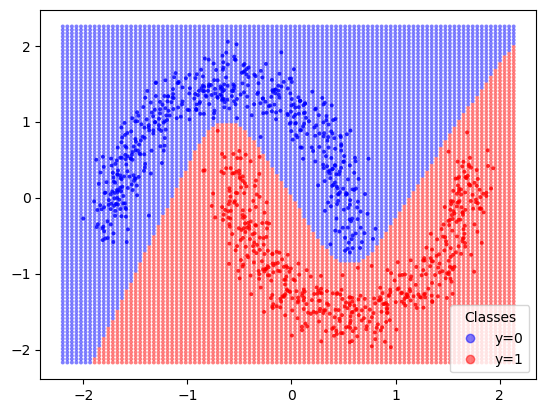

In [ ]:

y_predict = ann.predict(X_test.T)
fig, ax = plt.subplots()
scatter_2class(X_test,y_predict, ax = ax)
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx1, xx2 = np.meshgrid(np.linspace(xlim[0], xlim[1], 100), np.linspace(ylim[0], ylim[1], 100))
XX = np.c_[xx1.ravel(), xx2.ravel()]
YY_predict = ann.predict(XX.T)
scatter_2class(XX, YY_predict, ax = ax, alpha = 0.5)


In [ ]:
fig, ax = plt.subplots()
ax.plot(ann.error_epoch,'b')
ax.set_title('Cross-entropy error per Epoch ')
ax.set_xlabel('Epoch')
ax.set_ylabel(r'$E(w)$')
plt.show()